In [64]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create connection
connection = sqlite3.connect('student_grades.db')

# Create cursor
cursor = connection.cursor()


In [65]:
# Drop tables if already existed
cursor.execute('''
DROP TABLE IF EXISTS students;
''')

cursor.execute('''
DROP TABLE IF EXISTS grades;
''')

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    subject TEXT,
    grade INTEGER,
    student_id INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Students table created!")
print("Grades table created!")

Students table created!
Grades table created!


In [66]:
# Create tables
students_data = [
    ('Alice','Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

grades_data = [
    (1, 'Math', 99),
    (1, 'Science', 94),
    (1, 'History', 89),
    (2, 'Math', 80),
    (2, 'Science', 85),
    (2, 'History', 97),
    (3, 'Math', 93),
    (3, 'Science', 93),
    (3, 'History', 93),
    (4, 'Math', 94),
    (4, 'Science', 94),
    (4, 'History', 94),
    (5, 'Math', 90),
    (5, 'Science', 96),
    (5, 'History', 90),
]

# Insert table data into SQL
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit changes
connection.commit()

In [67]:
# Query every grade for every student
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
  JOIN grades ON students.student_id = grades.student_id
''')
students_grades = cursor.fetchall()

for row in students_grades:
    print(row)

('Alice', 'Johnson', 'Math', 99)
('Alice', 'Johnson', 'Science', 94)
('Alice', 'Johnson', 'History', 89)
('Bob', 'Smith', 'Math', 80)
('Bob', 'Smith', 'Science', 85)
('Bob', 'Smith', 'History', 97)
('Carol', 'White', 'Math', 93)
('Carol', 'White', 'Science', 93)
('Carol', 'White', 'History', 93)
('David', 'Brown', 'Math', 94)
('David', 'Brown', 'Science', 94)
('David', 'Brown', 'History', 94)
('Eve', 'Davis', 'Math', 90)
('Eve', 'Davis', 'Science', 96)
('Eve', 'Davis', 'History', 90)


In [68]:
# Query the average grades for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
  JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id;
''')
avg_grades = cursor.fetchall()

for row in avg_grades:
    print(row)

('Alice', 'Johnson', 94.0)
('Bob', 'Smith', 87.33333333333333)
('Carol', 'White', 93.0)
('David', 'Brown', 94.0)
('Eve', 'Davis', 92.0)


In [69]:
# Add order and limit to only query the top student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
  JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
      ORDER BY AVG(grades.grade) DESC
       LIMIT 1;
''')
avg_grades = cursor.fetchall()

for row in avg_grades:
    print(row)

('David', 'Brown', 94.0)


In [70]:
# Query the average grade for Math
cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject='Math';
''')
avg_grades = cursor.fetchone()

print(avg_grades[0])

91.2


In [71]:
# Query every grade over 90
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
  JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90;
''')
students_grades = cursor.fetchall()

for row in students_grades:
    print(row)

('Alice', 'Johnson', 'Math', 99)
('Alice', 'Johnson', 'Science', 94)
('Bob', 'Smith', 'History', 97)
('Carol', 'White', 'Math', 93)
('Carol', 'White', 'Science', 93)
('Carol', 'White', 'History', 93)
('David', 'Brown', 'Math', 94)
('David', 'Brown', 'Science', 94)
('David', 'Brown', 'History', 94)
('Eve', 'Davis', 'Science', 96)


In [72]:
# Load SQL tables into dataframes
students = pd.read_sql_query('SELECT * FROM students', connection)
grades = pd.read_sql_query('SELECT * FROM grades',  connection)

# Join SQL tables into a dataframe
students_grades = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
  JOIN grades ON students.student_id = grades.student_id
''', connection)

print(students_grades)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     99
1       Alice   Johnson  Science     94
2       Alice   Johnson  History     89
3         Bob     Smith     Math     80
4         Bob     Smith  Science     85
5         Bob     Smith  History     97
6       Carol     White     Math     93
7       Carol     White  Science     93
8       Carol     White  History     93
9       David     Brown     Math     94
10      David     Brown  Science     94
11      David     Brown  History     94
12        Eve     Davis     Math     90
13        Eve     Davis  Science     96
14        Eve     Davis  History     90


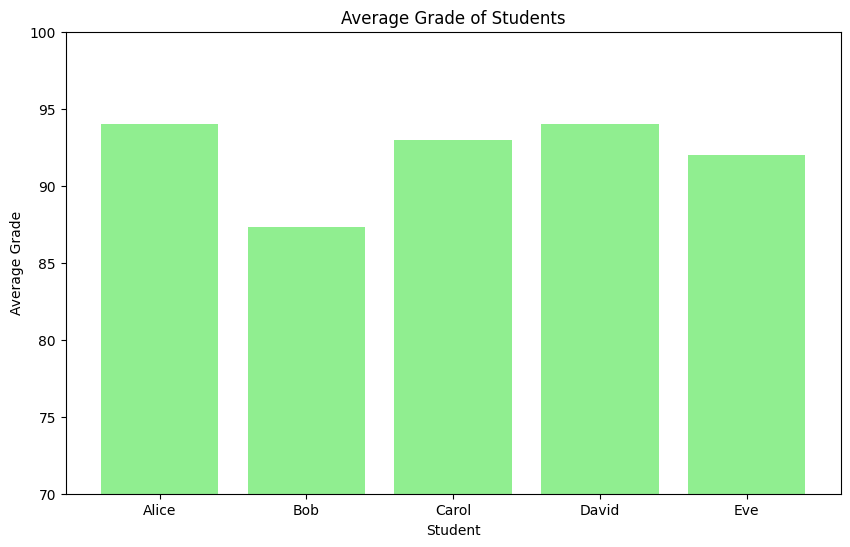

In [74]:
# Load average grades into a dataframe
avg_student_grades = pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
  JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id;
''', connection)

# Create bar chart to display avg_student_grades
plt.figure(figsize=(10,6))
plt.bar(avg_student_grades['first_name'], avg_student_grades['AVG(grades.grade)'], color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade of Students')
# Formatting for readability
plt.yticks([70,75,80,85,90,95,100])
plt.ylim(70,100)
plt.show()

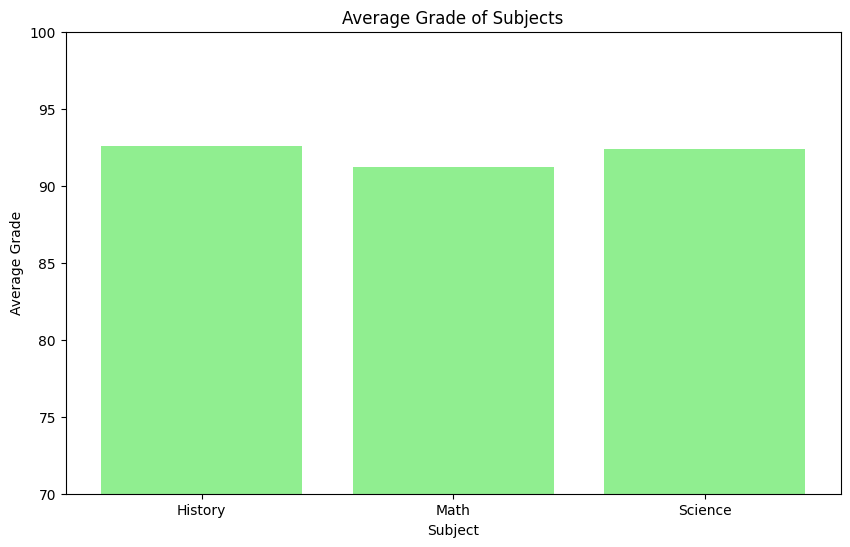

In [108]:
# Load average subject grades into a dataframe
avg_subject_grades = pd.read_sql_query('''
SELECT grades.subject, AVG(grades.grade) FROM grades
    GROUP BY grades.subject;
''', connection)

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(avg_subject_grades['subject'], avg_subject_grades['AVG(grades.grade)'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade of Subjects')
plt.yticks([70,75,80,85,90,95,100])
plt.ylim(70,100)
plt.show()

[('Bob', 'Smith', 'History', 97), ('Alice', 'Johnson', 'Math', 99), ('Eve', 'Davis', 'Science', 96)]


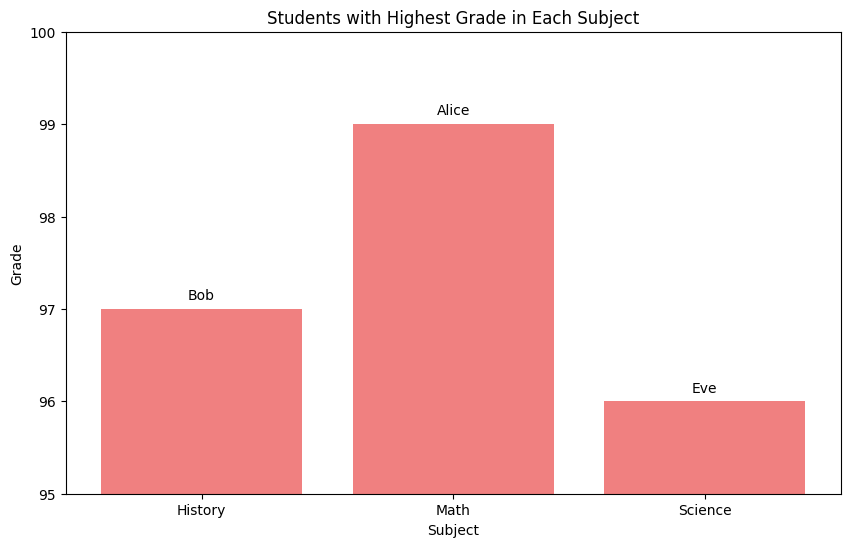

In [106]:
# Bonus
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) FROM students
  JOIN grades ON students.student_id = grades.student_id
    GROUP BY grades.subject
''')

top_subject_grades = cursor.fetchall()

print(top_subject_grades)

# Load data from top_subject_grades to be used in grouped bar chart
subjects = [row[2] for row in top_subject_grades]
grades = [row[3] for row in top_subject_grades]
students = [row[0] for row in top_subject_grades]

# Create grouped bar chart
plt.figure(figsize=(10, 6))
# Choose x and y axes
plt.bar( subjects, grades, color='lightcoral', label='Highest Grade')
plt.title('Students with Highest Grade in Each Subject')
plt.xlabel('Subject')
plt.ylabel('Grade')
# Label bars according to students who earned the grade
for i, grade in enumerate(grades):
    plt.text(i, grade+0.10, students[i], ha='center')
plt.yticks([95,96,97,98,99,100])
plt.ylim(95,100)
plt.show()

In [ ]:
# Close evverything
cursor.close()
connection.close()